### Eine lebensbedrohliche Gefahr einschätzen

<img src='https://www.barmherzige-schwandorf.de/fileadmin/_processed_/f/2/csm_kar_herzinfarkt_b742c35fcc.jpg' style='width:350px;'/>

Wir haben von [Kaggle](https://www.kaggle.com) Informationen zu gewissen Patienten (Raucher und Nicht-Raucher) heruntergeladen `framingham.csv`


Eine Erläuterung für Spaltennamen findet man [hier](https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression).

Ziel dieser Aufgabe ist, anhand relevanten Features in Dataset vorhersagen, welche Patient-innen in nächsten zehn Jahren von einem Herzinfakrt bedroht sind.  

Dabei muss eine einfache Ja-Nein-Frage beantwortet werden.   
Dazu wollen wir zuerst relevante Variablen in Dataset identifizieren und dann die Frage mit Hilfe der logitischen Reggression beantworten.


### 1. Datenvorbbereitung

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Dataframe erstellen und Eckdaten untersuchen
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### 2. Datenlücken behandeln

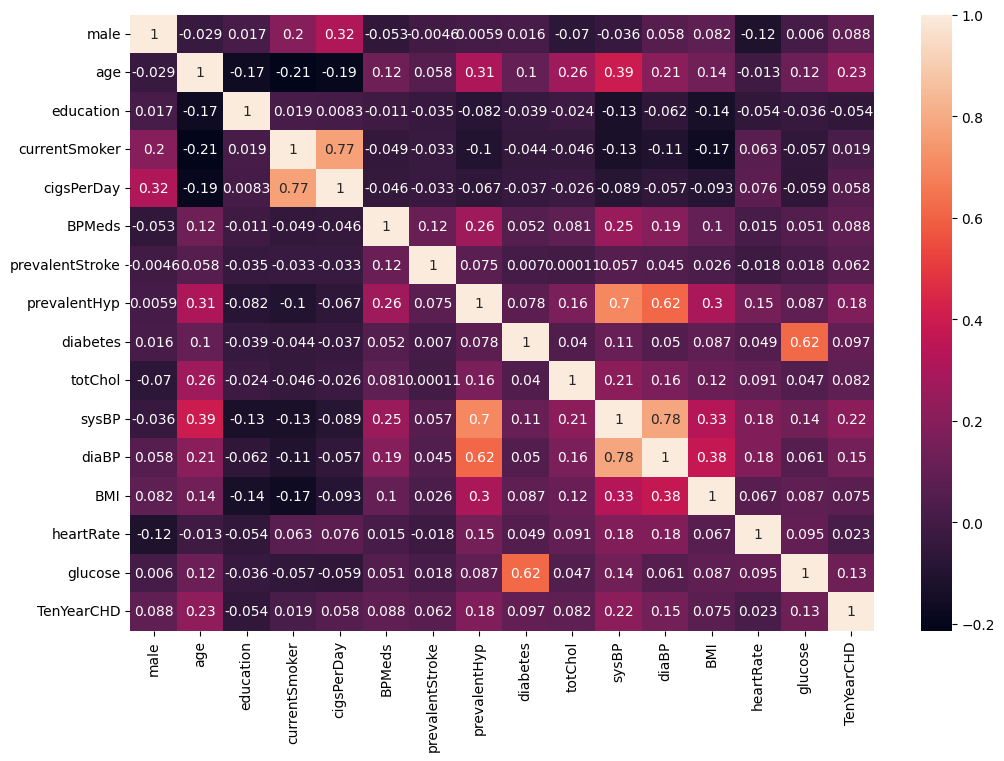

In [6]:
# korrelationsmatrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df[df['currentSmoker'] == 1]['cigsPerDay'].mean() # Durchschnitt Zigaretten am Tag

np.float64(18.35624394966118)

In [9]:
# Lücken in 'cigsPerDay' (sind auch nur für aktuelle Raucher belegt) mit Mittelwert ersetzen
df['cigsPerDay'].fillna(18, inplace=True)
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df.drop('education', axis=1, inplace=True) # die Spalte 'education' entfernen, weil unwichtig

In [11]:
# Fehlende Daten in 'glucose' mit dem Durchschitt ersetzen
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [12]:
# Fehlende Cholestrin werte mit Durchschnitte ersetzen
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [13]:
df.isna().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [14]:
# da die Anzahl des Rests (von Lücken) ein kleiner 
# Teil des Dataset ist, kann entfernt werden
df.dropna(inplace=True) 
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

#### 2.2 Datensatz ausbalancieren

In [16]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3545
1     622
Name: count, dtype: int64

In [17]:
# Daten für jede Klasse separieren
class_0 = df[df['TenYearCHD'] == 0]  # Alle Zeilen mit 'TenYearCHD' == 0
class_1 = df[df['TenYearCHD'] == 1]  # Alle Zeilen mit 'TenYearCHD' == 1

# Zufälliges Unterstichprobenziehen von Klasse 0
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)  # Zufällig 644 Zeilen auswählen

# Klassen wieder zusammenführen
df_balanced = pd.concat([class_0_balanced, class_1])

# Datensatz mischen
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Ausgabe der neuen Verteilung
print(df_balanced['TenYearCHD'].value_counts())

TenYearCHD
1    622
0    622
Name: count, dtype: int64


In [18]:
df_full = df

### 3. Ein Modell erstellen, trainieren und auswerten

#### 3.1 Modell mit ausgeglichenem Datensatz erstellen

In [19]:
# model erstellen
mod_bl = LogisticRegression()

In [21]:
# Daten vorbereiten

X_bl = df_balanced[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

y_bl = df_balanced['TenYearCHD']

X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(
    X_bl, y_bl, test_size=0.20, random_state=42) # 80% Trainset, 20% Testset

In [22]:
# Modell trainieren
mod_bl.fit(X_train_bl, y_train_bl)

LogisticRegression()

In [23]:
# Scores berechnen
print('Trainset Score (train accuracy):',mod_bl.score(X_train_bl, y_train_bl))
print('Testset Score (test accuracy):',mod_bl.score(X_test_bl, y_test_bl))

Trainset Score (train accuracy): 0.6552763819095477
Testset Score (test accuracy): 0.6385542168674698


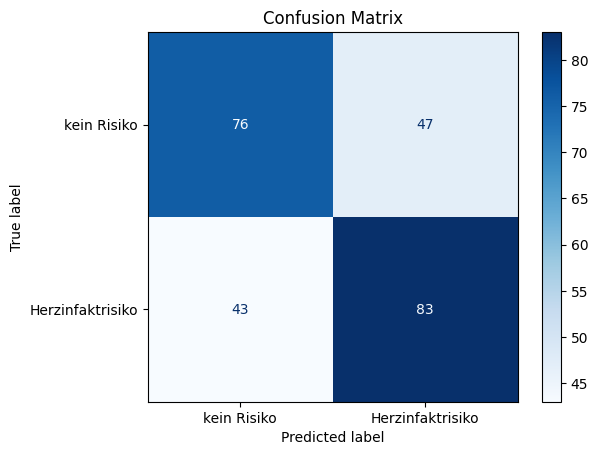

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       123
           1       0.64      0.66      0.65       126

    accuracy                           0.64       249
   macro avg       0.64      0.64      0.64       249
weighted avg       0.64      0.64      0.64       249



In [25]:
# confusion matrix: wird zur Auswertung von Klassifikationsmodellen eingesetzt
# Wo das Modell 'ja' sagt und dabei recht hat: True Positives
# Wo das Modell 'nein' sagt und dabei recht hat: True Negatives
# Wo das modell 'ja' sagt, hat aber unrecht: False Positives
# Wo das Modell 'nein' sagt, hat aber unrecht: False Negatives
# Metrics: F-Score und Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Confusion Matrix berechnen
y_true_bl = y_test_bl
y_pred_bl = mod_bl.predict(X_test_bl)
cm = confusion_matrix(y_true_bl, y_pred_bl)

# Confusion Matrix anzeigen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kein Risiko", "Herzinfaktrisiko"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_true_bl, y_pred_bl))

#### 3.2 Modell  mit gesamten Datensatz erstellen

In [26]:
# Daten vorbereiten

X_full = df_full[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

y_full = df_full['TenYearCHD']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42) # 80% Trainset, 20% Testset

mod_full = LogisticRegression()
mod_full.fit(X_train_full, y_train_full)

print('Trainset Score (train accuracy):',mod_full.score(X_train_full, y_train_full))
print('Testset Score (test accuracy):',mod_full.score(X_test_full, y_test_full))

Trainset Score (train accuracy): 0.846984698469847
Testset Score (test accuracy): 0.8705035971223022


#### Einfache Berechnung mit Standardschwellenwert

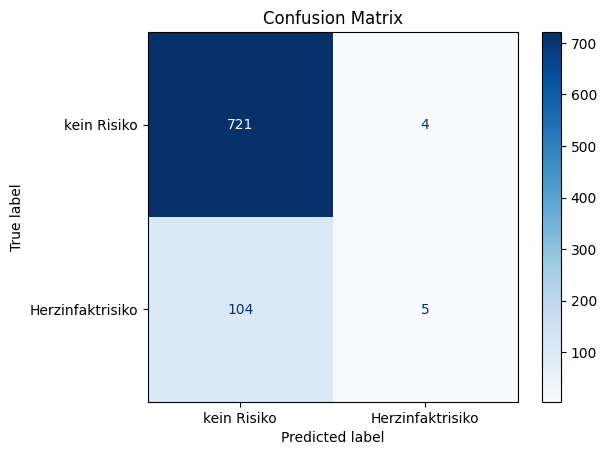

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       725
           1       0.56      0.05      0.08       109

    accuracy                           0.87       834
   macro avg       0.71      0.52      0.51       834
weighted avg       0.83      0.87      0.82       834



In [27]:
# confusion matrix: wird zur Auswertung von Klassifikationsmodellen eingesetzt
# Wo das Modell 'ja' sagt und dabei recht hat: True Positives
# Wo das Modell 'nein' sagt und dabei recht hat: True Negatives
# Wo das modell 'ja' sagt, hat aber unrecht: False Positives
# Wo das Modell 'nein' sagt, hat aber unrecht: False Negatives
# Metrics: F-Score und Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Confusion Matrix berechnen
y_true_full = y_test_full
y_pred_full = mod_full.predict(X_test_full)
cm = confusion_matrix(y_true_full, y_pred_full)

# Confusion Matrix anzeigen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kein Risiko", "Herzinfaktrisiko"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_true_full, y_pred_full))

#### Verschiedene Schwellenwerte (für die positive Klasse) mit gesamten Datensatz testen

In [28]:
y_scores_full = mod_full.predict_proba(X_test_full)[:, 1] # Rückgabewert von predict_proba enthält 2 Wahrscheinlichkeiten, eine für die negative und eine für die positive Klasse, 
                                                # wir nehmen die 2., also für die positive Klasse

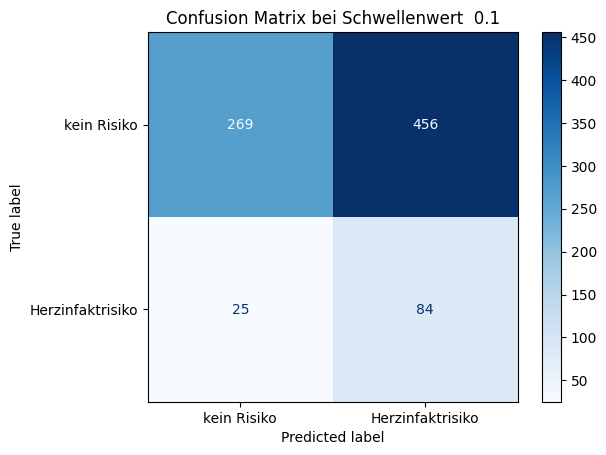

              precision    recall  f1-score   support

           0       0.91      0.37      0.53       725
           1       0.16      0.77      0.26       109

    accuracy                           0.42       834
   macro avg       0.54      0.57      0.39       834
weighted avg       0.82      0.42      0.49       834



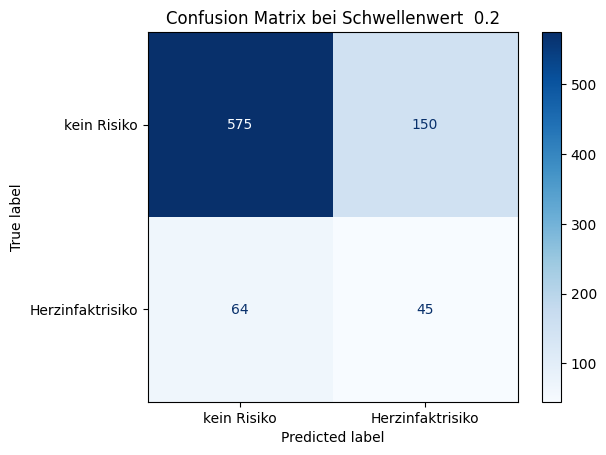

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       725
           1       0.23      0.41      0.30       109

    accuracy                           0.74       834
   macro avg       0.57      0.60      0.57       834
weighted avg       0.81      0.74      0.77       834



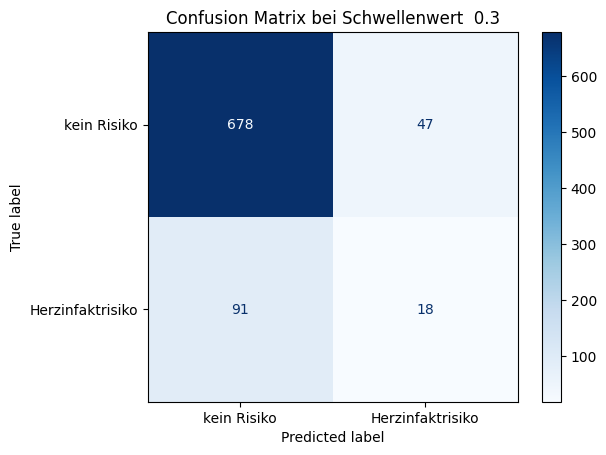

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       725
           1       0.28      0.17      0.21       109

    accuracy                           0.83       834
   macro avg       0.58      0.55      0.56       834
weighted avg       0.80      0.83      0.82       834



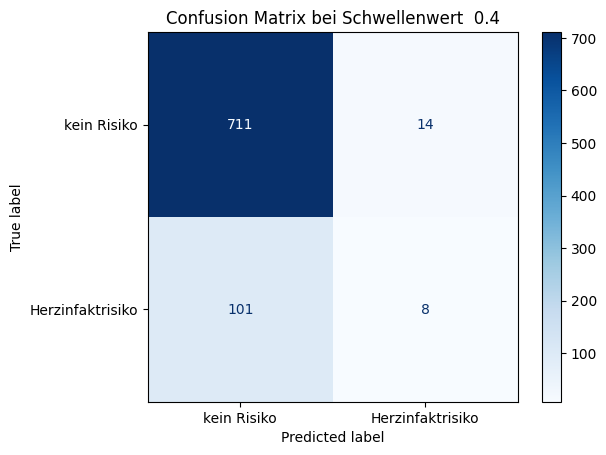

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       725
           1       0.36      0.07      0.12       109

    accuracy                           0.86       834
   macro avg       0.62      0.53      0.52       834
weighted avg       0.81      0.86      0.82       834



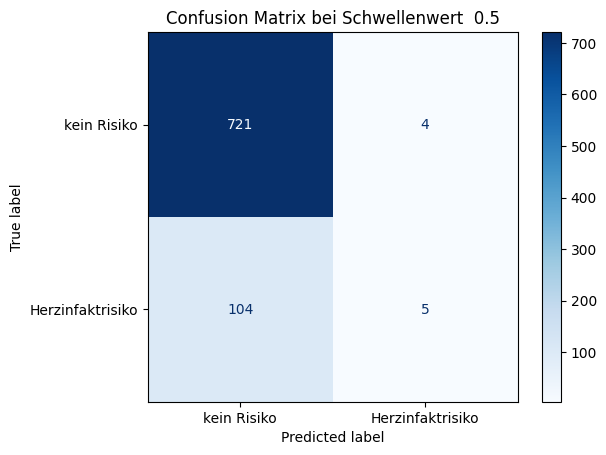

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       725
           1       0.56      0.05      0.08       109

    accuracy                           0.87       834
   macro avg       0.71      0.52      0.51       834
weighted avg       0.83      0.87      0.82       834



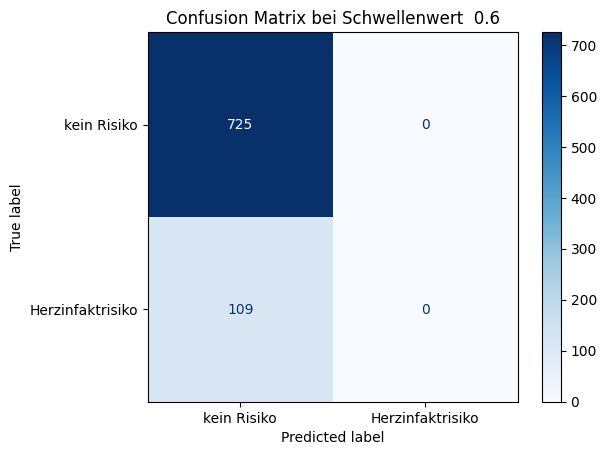

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       725
           1       0.00      0.00      0.00       109

    accuracy                           0.87       834
   macro avg       0.43      0.50      0.47       834
weighted avg       0.76      0.87      0.81       834



In [29]:
# Verschiedene Schwellenwerte
thresholds = np.arange(0.1, 0.7, 0.1)   # ab 0,6 werden alle in die negative Klasse eingeordnet -> keine Änderung mehr falls der Schwellenwert erhöht

for thresh in thresholds:
    y_pred_full = (y_scores_full >= thresh).astype(int) # Wir erzeugen die Vorhersage mit unterschiedlichen Schwellenwerten ab 0,1 
    cm = confusion_matrix(y_test_full, y_pred_full)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kein Risiko", "Herzinfaktrisiko"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix bei Schwellenwert {thresh: .1f}")
    plt.show()
    print(classification_report(y_true_full, y_pred_full))

#### Verschiedene Schwellenwerte (für die positive Klasse) mit ausgelichenen Datensatz testen

In [30]:
y_scores_bl = mod_full.predict_proba(X_test_bl)[:, 1] # Rückgabewert von predict_proba enthält 2 Wahrscheinlichkeiten, eine für die negative und eine für die positive Klasse, 
                                                # wir nehmen die 2., also für die positive Klasse

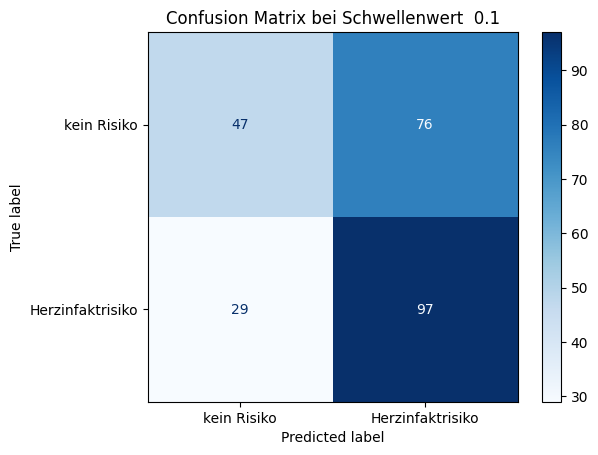

              precision    recall  f1-score   support

           0       0.62      0.38      0.47       123
           1       0.56      0.77      0.65       126

    accuracy                           0.58       249
   macro avg       0.59      0.58      0.56       249
weighted avg       0.59      0.58      0.56       249



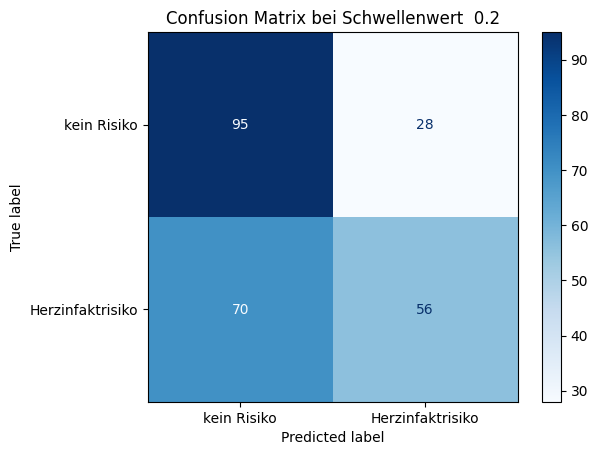

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       123
           1       0.67      0.44      0.53       126

    accuracy                           0.61       249
   macro avg       0.62      0.61      0.60       249
weighted avg       0.62      0.61      0.60       249



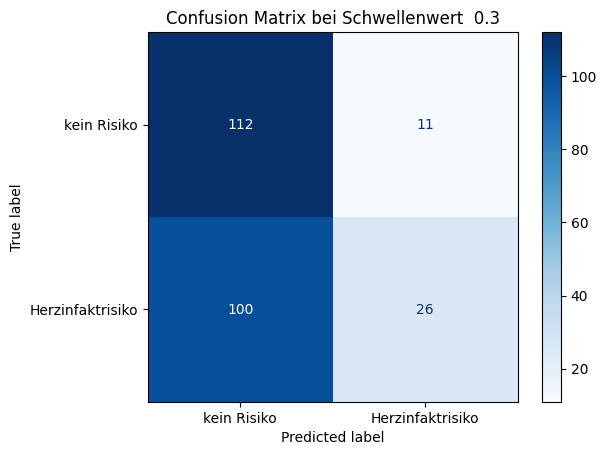

              precision    recall  f1-score   support

           0       0.53      0.91      0.67       123
           1       0.70      0.21      0.32       126

    accuracy                           0.55       249
   macro avg       0.62      0.56      0.49       249
weighted avg       0.62      0.55      0.49       249



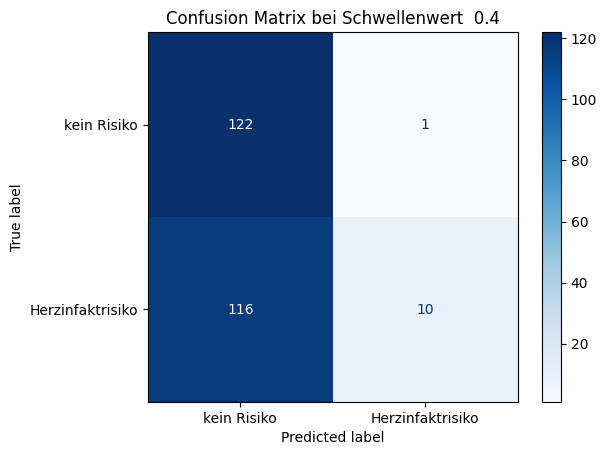

              precision    recall  f1-score   support

           0       0.51      0.99      0.68       123
           1       0.91      0.08      0.15       126

    accuracy                           0.53       249
   macro avg       0.71      0.54      0.41       249
weighted avg       0.71      0.53      0.41       249



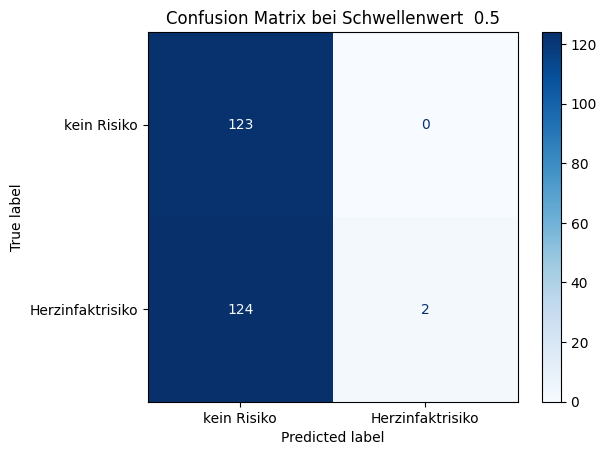

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       123
           1       1.00      0.02      0.03       126

    accuracy                           0.50       249
   macro avg       0.75      0.51      0.35       249
weighted avg       0.75      0.50      0.34       249



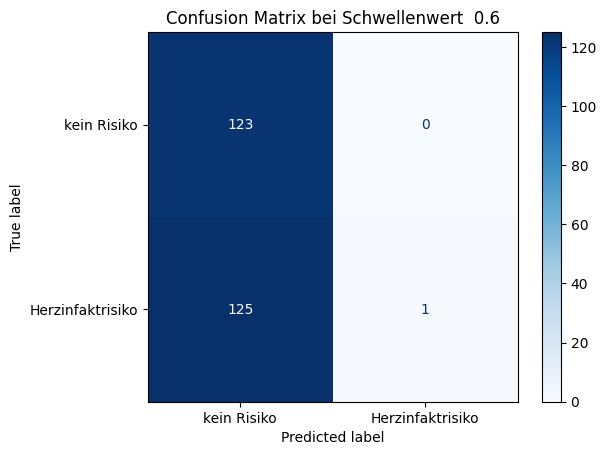

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       123
           1       1.00      0.01      0.02       126

    accuracy                           0.50       249
   macro avg       0.75      0.50      0.34       249
weighted avg       0.75      0.50      0.34       249



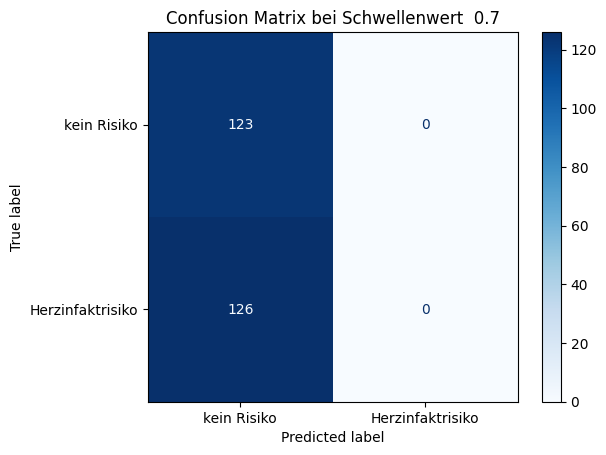

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       123
           1       0.00      0.00      0.00       126

    accuracy                           0.49       249
   macro avg       0.25      0.50      0.33       249
weighted avg       0.24      0.49      0.33       249



In [31]:
# Verschiedene Schwellenwerte
thresholds = np.arange(0.1, 0.8, 0.1)   # ab 0,6 werden alle in die negative Klasse eingeordnet -> keine Änderung mehr falls der Schwellenwert erhöht

for thresh in thresholds:
    y_pred_bl = (y_scores_bl >= thresh).astype(int) # Wir erzeugen die Vorhersage mit unterschiedlichen Schwellenwerten ab 0,1 
    cm = confusion_matrix(y_test_bl, y_pred_bl)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kein Risiko", "Herzinfaktrisiko"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix bei Schwellenwert {thresh: .1f}")
    plt.show()
    print(classification_report(y_true_bl, y_pred_bl))

### Roc Kurve für Modell mit allen Datensätzen
Erklärung zur Roc Kurve: https://datatab.de/tutorial/roc-kurve

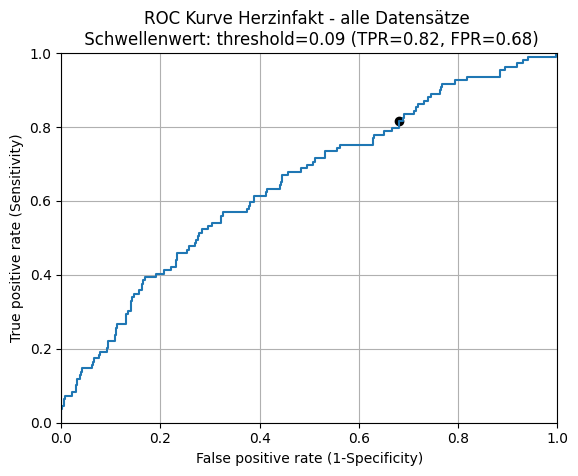

In [32]:
from sklearn.metrics import roc_curve, auc
y_pred_full_prob = mod_full.predict_proba(X_test_full)
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_full_prob[:,1])

index = 0
while tpr[index]<0.8:
    index += 1

plt.plot(fpr,tpr)
plt.scatter(fpr[index], tpr[index], color='black', marker='o')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Kurve Herzinfakt - alle Datensätze \n Schwellenwert: threshold=%.2f (TPR=%.2f, FPR=%.2f)' % (thresholds[index], tpr[index], fpr[index]))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

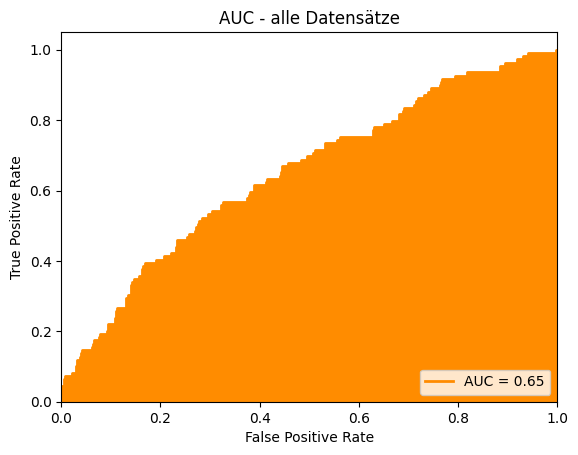

In [33]:
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, 0, tpr, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - alle Datensätze')
plt.legend(loc="lower right")
plt.show()

### Roc Kurve für Modell mit balancierten Datensätzen

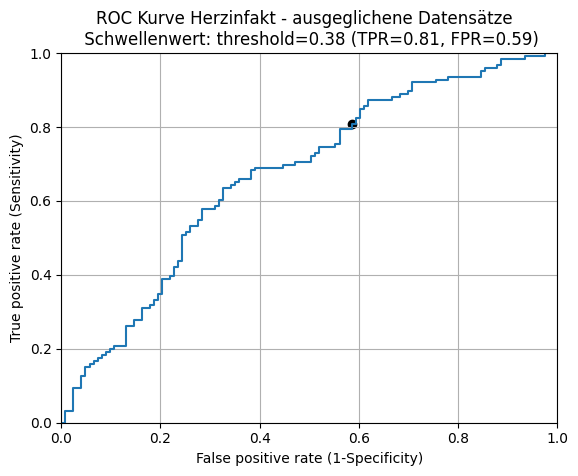

In [34]:
from sklearn.metrics import roc_curve
y_pred_bl_prob = mod_bl.predict_proba(X_test_bl)
fpr, tpr, thresholds = roc_curve(y_test_bl, y_pred_bl_prob[:,1])

index = 0
while tpr[index]<0.8:
    index += 1
    
plt.plot(fpr,tpr)
plt.scatter(fpr[index], tpr[index], color='black', marker='o')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Kurve Herzinfakt - ausgeglichene Datensätze  \n Schwellenwert: threshold=%.2f (TPR=%.2f, FPR=%.2f)' % (thresholds[index], tpr[index], fpr[index]))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

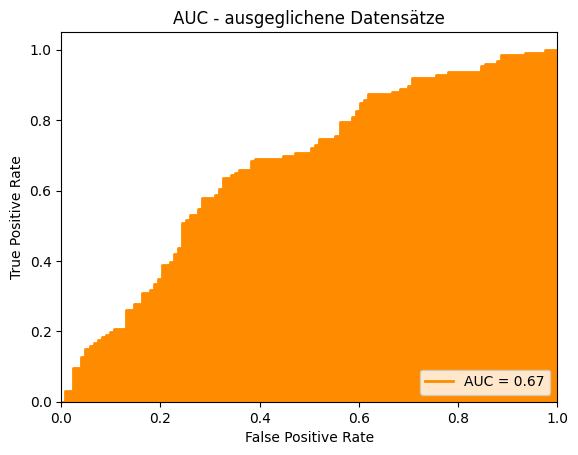

In [35]:
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, 0, tpr, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - ausgeglichene Datensätze')
plt.legend(loc="lower right")
plt.show()